Week 2

In [1]:

#try 150 data point 
#use bidirectional LSTM
    #Add Dropout regularization
    #Add activation functio nin each layer

In [2]:
#Stock Price Prediction And Forecasting Using Stacked LSTM- Deep Learning

In [3]:
import pandas_datareader as pdr
#using tiingo library
key="08b78fbc98302e995956e2d3b5b8f3c0296d32cc"

I choose these companies because I know them or I read news about them. 
There are no particular reasons

In [4]:

stock = "BURL"#"EW"#"SYK"#"BACHF"#"NTTYY"#"INTC"#"DIS"#"TSLA"#"KEY"#"MSI"#"NVDA"#"AAPL"#"COST"#"AMZN"#"RIVN"#"GLD"#"RPRX"#"WDAY"#"CVX"#"FND"
df = pdr.get_data_tiingo(stock, api_key=key)

In [5]:
df.to_csv(f'{stock}.csv')

In [6]:
import pandas as pd
df = pd.read_csv(f'{stock}.csv')
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,BURL,2016-11-28 00:00:00+00:00,87.38,89.1800,87.075,88.70,1251933,87.38,89.1800,87.075,88.70,1251933,0.0,1.0
1,BURL,2016-11-29 00:00:00+00:00,88.92,89.9900,87.000,87.26,1282604,88.92,89.9900,87.000,87.26,1282604,0.0,1.0
2,BURL,2016-11-30 00:00:00+00:00,87.92,89.4587,87.620,88.66,1098975,87.92,89.4587,87.620,88.66,1098975,0.0,1.0
3,BURL,2016-12-01 00:00:00+00:00,88.76,89.3400,87.620,87.62,1196655,88.76,89.3400,87.620,87.62,1196655,0.0,1.0
4,BURL,2016-12-02 00:00:00+00:00,88.76,89.8200,88.220,88.54,891223,88.76,89.8200,88.220,88.54,891223,0.0,1.0


In [7]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1254,BURL,2021-11-19 00:00:00+00:00,264.97,272.965,262.30,271.51,831543,264.97,272.965,262.30,271.51,831543,0.0,1.0
1255,BURL,2021-11-22 00:00:00+00:00,263.00,269.540,259.78,268.56,712750,263.00,269.540,259.78,268.56,712750,0.0,1.0
1256,BURL,2021-11-23 00:00:00+00:00,285.55,292.300,268.82,271.99,2313464,285.55,292.300,268.82,271.99,2313464,0.0,1.0
1257,BURL,2021-11-24 00:00:00+00:00,290.09,293.305,274.42,281.95,1572214,290.09,293.305,274.42,281.95,1572214,0.0,1.0
1258,BURL,2021-11-26 00:00:00+00:00,283.85,286.575,275.42,281.72,917376,283.85,286.575,275.42,281.72,917376,0.0,1.0


In [8]:
#value to predict
df_closePrice = df.reset_index()['close']

In [9]:
df_closePrice.shape

(1259,)

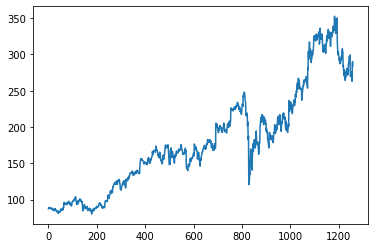

In [10]:
import matplotlib.pyplot as plt
plt.plot(df_closePrice)

In [11]:
#LSTM is sensitive to the scale 
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# use MinMax scalar to transform the value between 0 and 1
scaler=MinMaxScaler(feature_range=(0,1))
df_closePrice=scaler.fit_transform(np.array(df_closePrice).reshape(-1,1))



In [12]:
#converted to array of values between 0 and 1 
df_closePrice 

array([[0.0261042 ],
       [0.03175827],
       [0.02808679],
       ...,
       [0.75368065],
       [0.77034916],
       [0.74743915]])

In [13]:
# make train test split
split_percentage = 0.65
training_size = int(len(df_closePrice)*split_percentage)
test_size=len(df_closePrice)-training_size
#split the dataframe
train_data = df_closePrice[0:training_size,:]
test_data = df_closePrice[training_size:len(df_closePrice),:1]

print(len(train_data))
print(len(test_data))

818
441


In [14]:

# This method is use to separate the data in the order of its timeline
	#for example, 
	#Train: 1, 2, 4, 1, 5, 6 
	#will return 1, 2, 4, 1 (train_x); 5, 6 (train_y)
#This will preserve the time in the model,
#so we cannot use the future to predict the past
def create_dataset(dataset, time_step=1):
	x, y = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		x.append(a)
		y.append(dataset[i + time_step, 0])
	return np.array(x), np.array(y)

In [15]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4

#change from 100 to 150

time_step = 150 #more the better; train test split

train_x, train_y = create_dataset(train_data, time_step)
test_x, test_y = create_dataset(test_data, time_step)

In [16]:
print(train_x)

[[0.0261042  0.03175827 0.02808679 ... 0.04244227 0.0430297  0.04717847]
 [0.03175827 0.02808679 0.03117083 ... 0.0430297  0.04717847 0.03168484]
 [0.02808679 0.03117083 0.03117083 ... 0.04717847 0.03168484 0.02918824]
 ...
 [0.36846936 0.37463744 0.37349928 ... 0.60773947 0.59125454 0.57968939]
 [0.37463744 0.37349928 0.36443074 ... 0.59125454 0.57968939 0.56896868]
 [0.37349928 0.36443074 0.36982781 ... 0.57968939 0.56896868 0.56430591]]


In [17]:
print(train_x.shape), print(train_y.shape)
print(test_x.shape), print(test_y.shape)

(667, 150)
(667,)
(290, 150)
(290,)


(None, None)

In [18]:
#reshape input 
train_x =train_x.reshape(train_x.shape[0],train_x.shape[1] , 1)
test_x = test_x.reshape(test_x.shape[0],test_x.shape[1] , 1)

In [19]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


In [20]:
#Creating nested LSTM model
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout

model = Sequential()

#change layer input from 100 to 150

#CHANGE 
    #Add Bidirectional LSTM layer
    #Add Dropout regularization
    #Add activation functio nin each layer

#parameter obtain from the paper
    #http://cs230.stanford.edu/projects_winter_2020/reports/32066186.pdf

model.add(Bidirectional(LSTM(50,return_sequences=True,activation="tanh"),input_shape=(150,1)))
model.add(Bidirectional(LSTM(50,return_sequences=True)))
model.add(Bidirectional(LSTM(50,dropout=0.2)))
#model.add(Bidirectional(LSTM(50,activation="tanh")))
#add sigmoid
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mean_squared_error',optimizer='adam')



In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 150, 100)          20800     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 150, 100)          60400     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 100)               60400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 141,701
Trainable params: 141,701
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.fit(train_x,train_y,validation_data=(test_x,test_y),epochs=100,batch_size=64,verbose=1)


Epoch 1/100
11/11 [==============================] - 19s 926ms/step - loss: 0.0489 - val_loss: 0.3561
Epoch 2/100
11/11 [==============================] - 7s 662ms/step - loss: 0.0262 - val_loss: 0.2196
Epoch 3/100
11/11 [==============================] - 7s 656ms/step - loss: 0.0189 - val_loss: 0.0849
Epoch 4/100
11/11 [==============================] - 7s 662ms/step - loss: 0.0065 - val_loss: 0.0081
Epoch 5/100
11/11 [==============================] - 7s 654ms/step - loss: 0.0026 - val_loss: 0.0175
Epoch 6/100
11/11 [==============================] - 7s 644ms/step - loss: 0.0022 - val_loss: 0.0155
Epoch 7/100
11/11 [==============================] - 7s 653ms/step - loss: 0.0016 - val_loss: 0.0192
Epoch 8/100
11/11 [==============================] - 7s 640ms/step - loss: 0.0014 - val_loss: 0.0212
Epoch 9/100
11/11 [==============================] - 7s 635ms/step - loss: 0.0012 - val_loss: 0.0206
Epoch 10/100
11/11 [==============================] - 7s 676ms/step - loss: 0.0011 - val_l

In [23]:
import tensorflow as tf

train_predict = model.predict(train_x)
test_predict = model.predict(test_x)

In [24]:
#Transform back to original data range
#from (0,1) back to original range

train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [25]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error

#result for training dataset
math.sqrt(mean_squared_error(train_y,train_predict))


160.44412218411588

In [26]:
### Test Data RMSE
math.sqrt(mean_squared_error(test_y,test_predict))

250.9386697238622

In [27]:
train_predict.shape

(667, 1)

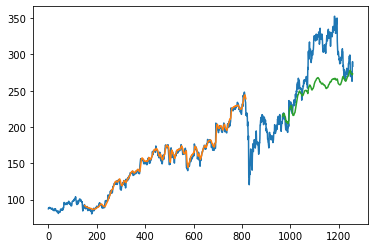

In [28]:
### Plotting 
# shift train predictions for plotting

#CHANGE look back change from 100 to 150

look_back=150
trainPredictPlot = np.empty_like(df_closePrice)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df_closePrice)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df_closePrice)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df_closePrice))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

#test predict is green
#blue is the whole data set
#orange is the train predict

In [29]:
#prediction

#Change look
start_point = len(test_data) -look_back
#use 100 data poin to predict
x_input=test_data[start_point:].reshape(1,-1)
x_input.shape



(1, 150)

In [30]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist() #all the test_data with previous 100 data point

In [31]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=150
i=0

# CHANGE
date_predict = 30
while(i<date_predict):
    
    if(len(temp_input)>150):
        #if more than 150 data point shift the list to contain only 150 datapoint

        #print(temp_input)
        x_input=np.array(temp_input[1:]) #shifting one poistion to the right
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        y_pred = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,y_pred))
        temp_input.extend(y_pred[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(y_pred.tolist())
        i=i+1
    else:
        #use the 100 data point to predict
        x_input = x_input.reshape((1, n_steps,1)) #reshape the data
        y_pred = model.predict(x_input, verbose=0)
        print(y_pred[0])
        temp_input.extend(y_pred[0].tolist())
        print(len(temp_input))

        #add to the temp_input
        lst_output.extend(y_pred.tolist()) 
        i=i+1
    

print(lst_output)

[0.71569425]
151
1 day input [0.87994272 0.88644124 0.90340346 0.90487205 0.89675809 0.90472519
 0.89719866 0.92058597 0.91192128 0.91397731 0.85857473 0.86790028
 0.93068253 0.93938393 0.90795609 0.89866725 0.88544994 0.88996586
 0.88240261 0.88673496 0.91026912 0.89723538 0.89253589 0.85982303
 0.83346184 0.81914308 0.82274112 0.82020781 0.83632559 0.82505415
 0.82090539 0.85560084 0.84300767 0.82960678 0.84458641 0.82420971
 0.81253442 0.84374197 0.86165877 0.8604839  0.88974557 0.9022653
 0.87685868 0.87550024 0.88746925 0.90318317 0.92396373 0.934097
 0.89848368 0.88824026 0.91647391 0.91790579 0.91581305 0.92010868
 0.91533576 0.88192532 0.84818445 0.87550024 0.90175129 0.89918126
 0.91676763 0.91588648 0.89793296 0.89668466 0.91511547 0.93450086
 0.91911738 0.94867276 0.92635019 0.93776848 0.94716746 0.93068253
 0.99838455 1.         0.9756214  0.96405625 0.95652972 0.91316959
 0.94276168 0.98623196 0.98120204 0.96104564 0.97558468 0.99085802
 0.87285678 0.84172266 0.81308514 0.

In [32]:
#start plotting the new 30 predictions
day_new=np.arange(1,151)
day_pred=np.arange(151,181)

Text(0.5, 1.0, 'BURL')

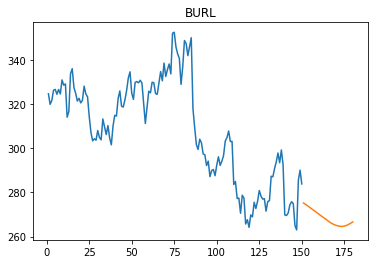

In [33]:
total_start = len(df_closePrice) - 150

plt.plot(day_new,scaler.inverse_transform(df_closePrice[total_start:])) #use the previous 150 data
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.title(stock)

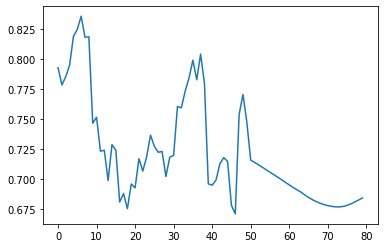

In [34]:
#combine to the whole data
df3=df_closePrice.tolist()
df3.extend(lst_output)
view_point = len(df_closePrice)-50
plt.plot(df3[view_point:])

In [35]:
#https://towardsdatascience.com/stock-market-action-prediction-with-convnet-8689238feae3
#https://towardsdatascience.com/predicting-stock-price-with-lstm-13af86a74944
#Future plan use new headline as a feature
    #challenge : how to label?